In [1]:
import os
from pathlib import Path
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from collections import defaultdict
import ast
import random
plt.style.use('seaborn-white')

while Path.cwd().name != 'cartography':
    %cd ..

/gscratch/xlab/alisaliu/cartography


In [17]:
al_dir = Path('output/mnli_al_0.1')
metrics = ['random', 'mean_variability', 'final_confidence']

In [20]:
diagnostics_acc = {m: [] for m in metrics}
mismatched_acc = {m: [] for m in metrics}

with open(al_dir / '0/eval_metrics_diagnostics.json') as fin:
    lines = fin.readlines()
    for m in metrics:
        diagnostics_acc[m].append(float(lines[-1].split(':')[1][1:7]))

In [21]:
iterations = 3
for i in range(1, iterations+1):
    for m in metrics:
        with open(al_dir / f'{m}/{i}/eval_metrics_diagnostics.json') as fin:
            lines = fin.readlines()
            diagnostics_acc[m].append(float(lines[-1].split(':')[1][1:7]))

In [22]:
diagnostics_acc

{'random': [0.6458, 0.6449, 0.6386, 0.6404],
 'mean_variability': [0.6458, 0.6558, 0.6504, 0.6449],
 'final_confidence': [0.6458, 0.6585, 0.6576, 0.5516]}

<Figure size 432x288 with 0 Axes>

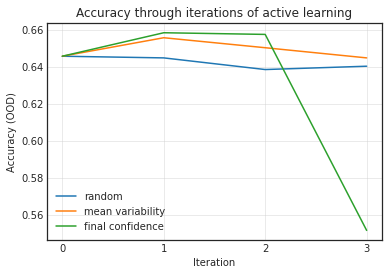

In [31]:
plt.figure()
fig, ax = plt.subplots()
for m in metrics:
    label = ' '.join(m.split('_'))
    sns.lineplot(x=range(iterations+1), y=diagnostics_acc[m], label=label)

ax.set_xticks(range(iterations+1))
ax.set_xlabel('Iteration')
ax.set_ylabel('Accuracy (OOD)')
plt.grid(alpha=0.5)
plt.title('Accuracy through iterations of active learning')
plt.savefig('figures/al_accuracy.png', dpi=2000)